In [32]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [34]:
from arch import arch_model

Сначала нужны функции, взяла их из готовых материалов лектора



In [35]:
# Dickey-Fuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 
                                               'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [36]:
# Функция для коррелограмм

def tsplot(y, lags = None, figsize = (14, 8), style = 'bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize = figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan = 2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax = ts_ax, color = 'blue', label = 'Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)

        plt.tight_layout()
    return


In [37]:
mean_monthly_temp = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/mean-monthly-air-temperature-deg.csv').dropna().values[:, 1]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


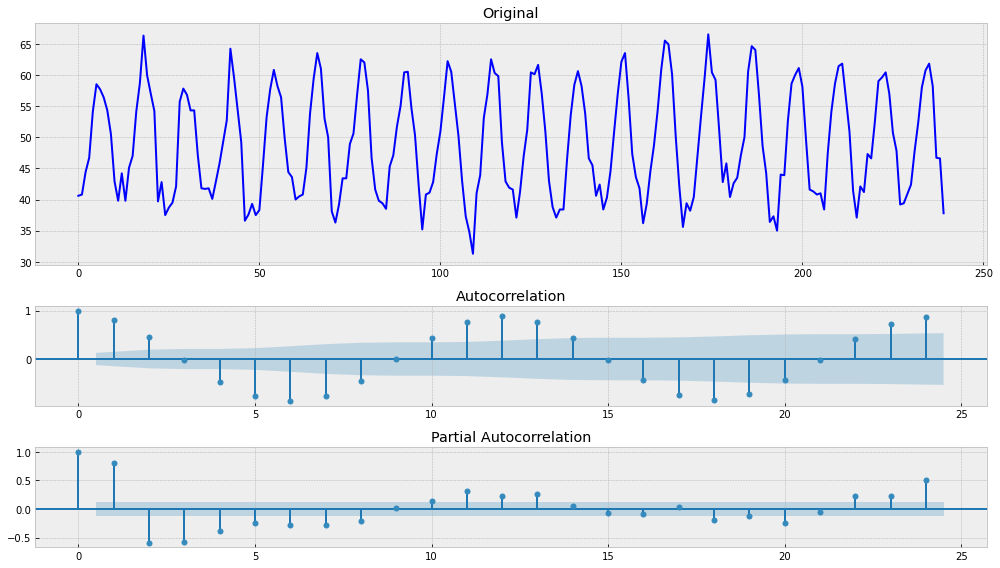

In [38]:
tsplot(mean_monthly_temp)

In [39]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    tmp_mdl = smt.ARIMA(TS, order = (i, d, j)).fit(
                        method = 'mle', trend = 'nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

aic, order, mdl = _get_best_model(mean_monthly_temp)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74261D+00    |proj g|=  8.73770D-02

At iterate    5    f=  4.68219D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      6      1     0     0   0.000D+00   4.682D+00
  F =   4.6821946989188747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.00408D+00    |proj g|=  6.81844D-02

At iterate   10    f=  2.94472D+00    |proj g|=  6.69833D-03

At iterate   15    f=  2.94158D+00    |proj g|=  4.41247D-04

At iterate   20    f=  2.94152D+00    |proj g|=  9.56524D-04

At iterate   25    f=  2.94152D+00    |proj g|=  3.07754D-05

At iterate   30    f=  2.94152D+00    |proj g|=  3.01981D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     52      1     0     0   1.021D-06   2.942D+00
  F =   2.9415169780005392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47926D+00    |proj g|=  2.55462D-01

At iterate    5    f=  3.00415D+00    |proj g|=  1.01030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     19      1     0     0   0.000D+00   3.004D+00
  F =   3.0041436509935666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   30    f=  2.99985D+00    |proj g|=  1.38112D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     64      2     0     0   8.882D-08   3.000D+00
  F =   2.9998542779664925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07593D+00    |proj g|=  6.93697D-01

At iterate    5    f=  2.91055D+00    |proj g|=  3.75255D-02

At iterate   10    f=  2.88608D+00    |proj g|=  8.69846D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     55      1     0     0   4.130D-06   2.873D+00
  F =   2.8730773459878574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95791D+00    |proj g|=  7.84706D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14691D+00    |proj g|=  8.41194D-01

At iterate    5    f=  2.96335D+00    |proj g|=  3.54228D-03

At iterate   10    f=  2.96298D+00    |proj g|=  7.88702D-05

At iterate   15    f=  2.96298D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     17      1     0     0   0.000D+00   2.963D+00
  F =   2.9629781423603938     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  2.40761D+00    |proj g|=  2.60807D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30    199      4     2     0   2.608D-02   2.408D+00
  F =   2.4076071259249781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27807D+00    |proj g|=  6.29722D-01

At iterate    5    f=  2.49116D+00    |proj g|=  1.07293D-01

At iterate   10    f=  2.42128D+00    |proj g|=  7.05495D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  2.38041D+00    |proj g|=  3.09590D-02

At iterate   30    f=  2.38037D+00    |proj g|=  2.67407D-02
  ys=-3.844E-07  -gs= 3.283E-07 BFGS update SKIPPED

At iterate   35    f=  2.38036D+00    |proj g|=  3.76954D-02

At iterate   40    f=  2.38015D+00    |proj g|=  9.08825D-02

At iterate   45    f=  2.38004D+00    |proj g|=  1.05467D-02

At iterate   50    f=  2.37998D+00    |proj g|=  5.69938D-02

At iterate   55    f=  2.37998D+00    |proj g|=  2.46544D-02

At iterate   60    f=  2.37997D+00    |proj g|=  4.54141D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.705E-11  -gs= 2.121E-10 BFGS update SKIPPED

At iterate   65    f=  2.37996D+00    |proj g|=  1.58321D-01

At iterate   70    f=  2.37989D+00    |proj g|=  1.75052D-02
  ys=-1.364E-11  -gs= 1.400E-11 BFGS update SKIPPED

At iterate   75    f=  2.37989D+00    |proj g|=  6.08192D-02
  ys=-9.405E-11  -gs= 1.250E-11 BFGS update SKIPPED

At iterate   80    f=  2.37989D+00    |proj g|=  5.22537D-02

At iterate   85    f=  2.37988D+00    |proj g|=  1.92597D-02

At iterate   90    f=  2.37987D+00    |proj g|=  8.91930D-02
  ys=-5.813E-06  -gs= 6.259E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   95    f=  2.37983D+00    |proj g|=  1.71477D-02

At iterate  100    f=  2.37930D+00    |proj g|=  1.11287D-01

At iterate  105    f=  2.37882D+00    |proj g|=  1.41186D-02
  ys=-1.875E-10  -gs= 4.021E-10 BFGS update SKIPPED

At iterate  110    f=  2.37882D+00    |proj g|=  3.54670D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  115    f=  2.37879D+00    |proj g|=  6.78861D-02

At iterate  120    f=  2.37871D+00    |proj g|=  4.91075D-02
  ys=-4.660E-11  -gs= 7.223E-11 BFGS update SKIPPED

At iterate  125    f=  2.37869D+00    |proj g|=  3.87598D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  130    f=  2.37869D+00    |proj g|=  3.05543D-02

At iterate  135    f=  2.37863D+00    |proj g|=  4.00006D-02

At iterate  140    f=  2.37862D+00    |proj g|=  2.04193D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  145    f=  2.37861D+00    |proj g|=  5.39309D-02
  ys=-3.355E-07  -gs= 2.527E-07 BFGS update SKIPPED

At iterate  150    f=  2.37861D+00    |proj g|=  3.40186D-02

At iterate  155    f=  2.37861D+00    |proj g|=  2.99071D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  160    f=  2.37857D+00    |proj g|=  9.41715D-02

At iterate  165    f=  2.37803D+00    |proj g|=  4.62725D-02

At iterate  170    f=  2.37788D+00    |proj g|=  2.85708D-02

At iterate  175    f=  2.37787D+00    |proj g|=  3.04449D-02

At iterate  180    f=  2.37784D+00    |proj g|=  5.91469D-02

At iterate  185    f=  2.37784D+00    |proj g|=  5.42220D-02

At iterate  190    f=  2.37783D+00    |proj g|=  5.05460D-02

At iterate  195    f=  2.37768D+00    |proj g|=  1.64368D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  200    f=  2.37766D+00    |proj g|=  4.95804D-02

At iterate  205    f=  2.37747D+00    |proj g|=  2.34263D-01

At iterate  210    f=  2.37686D+00    |proj g|=  9.14135D-02

At iterate  215    f=  2.37663D+00    |proj g|=  3.38922D-02

At iterate  220    f=  2.37663D+00    |proj g|=  4.20147D-02
  ys=-2.883E-06  -gs= 4.260E-06 BFGS update SKIPPED

At iterate  225    f=  2.37663D+00    |proj g|=  3.13507D-02

At iterate  230    f=  2.37662D+00    |proj g|=  4.61976D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  235    f=  2.37661D+00    |proj g|=  5.81306D-02

At iterate  240    f=  2.37661D+00    |proj g|=  3.78971D-02

At iterate  245    f=  2.37660D+00    |proj g|=  5.66451D-02

At iterate  250    f=  2.37660D+00    |proj g|=  3.85338D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    254   1198     15     9     0   4.300D-02   2.377D+00
  F =   2.3765958839668699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.95290D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   8.882D-08   2.953D+00
  F =   2.9528985059670259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14489D+00    |proj g|=  5.15594D-01

At iterate    5    f=  2.58594D+00    |proj g|=  1.12219D-01

At iterate   10    f=  2.45559D+00    |proj g|=  3.79214D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  2.44327D+00    |proj g|=  5.24430D-02

At iterate   50    f=  2.44322D+00    |proj g|=  5.81747D-02

At iterate   55    f=  2.44316D+00    |proj g|=  4.68285D-02

At iterate   60    f=  2.44315D+00    |proj g|=  4.57594D-02

At iterate   65    f=  2.44070D+00    |proj g|=  1.06302D-01

At iterate   70    f=  2.44041D+00    |proj g|=  1.23827D-01

At iterate   75    f=  2.44018D+00    |proj g|=  3.51978D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     76    347      4     0     0   3.520D-02   2.440D+00
  F =   2.4401818974880403     

ABNORMAL_TERMINATION_IN_LNSRCH                    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31263D+00    |proj g|=  6.04700D-01

At iterate    5    f=  2.54760D+00    |proj g|=  1.20664D-01
  ys=-2.326E-01  -gs= 6.882E-02 BFGS update SKIPPED

At iterate   10    f=  2.44545D+00    |proj g|=  7.47633D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15    106      3     1     0   7.135D-01   2.444D+00
  F =   2.4444202314497776     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90704D+00    |proj g|=  1.58651D-03

At iterate    5    f=  2.90703D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-4.178E-03  -gs= 1.590E-03 BFGS update SKIPPED

At iterate   20    f=  2.39880D+00    |proj g|=  9.14475D-02

At iterate   25    f=  2.39731D+00    |proj g|=  2.09489D-02

At iterate   30    f=  2.38838D+00    |proj g|=  1.03323D-01

At iterate   35    f=  2.38362D+00    |proj g|=  2.31474D-01

At iterate   40    f=  2.38346D+00    |proj g|=  1.16438D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  2.38325D+00    |proj g|=  1.28556D-02

At iterate   50    f=  2.38324D+00    |proj g|=  1.69947D-02

At iterate   55    f=  2.38324D+00    |proj g|=  1.32213D-02

At iterate   60    f=  2.38320D+00    |proj g|=  1.00596D-02
  ys=-1.681E-05  -gs= 7.697E-05 BFGS update SKIPPED

At iterate   65    f=  2.38286D+00    |proj g|=  1.18687D-01

At iterate   70    f=  2.38284D+00    |proj g|=  1.54407D-02

At iterate   75    f=  2.38283D+00    |proj g|=  1.54376D-02

At iterate   80    f=  2.38282D+00    |proj g|=  6.61027D-03

At iterate   85    f=  2.38282D+00    |proj g|=  1.18729D-02

At iterate   90    f=  2.38282D+00    |proj g|=  3.76850D-03

At iterate   95    f=  2.38281D+00    |proj g|=  2.97395D-02

At iterate  100    f=  2.38281D+00    |proj g|=  4.73417D-03

At iterate  105    f=  2.38281D+00    |proj g|=  7.70348D-03

At iterate  110    f=  2.38281D+00    |proj g|=  2.88618D-03

At iterate  115    f=  2.38281D+00    |proj g|=  1.75393D-03

At iterate  120  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  145    f=  2.38269D+00    |proj g|=  2.12576D-02

At iterate  150    f=  2.38268D+00    |proj g|=  2.32458D-02

At iterate  155    f=  2.38267D+00    |proj g|=  6.38543D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  160    f=  2.38267D+00    |proj g|=  7.93654D-03

At iterate  165    f=  2.38267D+00    |proj g|=  4.24603D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    169    470      6     4     0   6.476D-03   2.383D+00
  F =   2.3826684696532454     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03910D+00    |proj g|=  1.78035D-03

At iterate    5    f=  3.03909D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   4.441D-08   3.039D+00
  F =   3.0390913964807642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.49258D+00    |proj g|=  2.13280D-01

At iterate   10    f=  2.42755D+00    |proj g|=  1.58162D-01

At iterate   15    f=  2.41845D+00    |proj g|=  5.21100D-01

At iterate   20    f=  2.41682D+00    |proj g|=  1.69194D-01

At iterate   25    f=  2.41523D+00    |proj g|=  3.67239D-02

At iterate   30    f=  2.40625D+00    |proj g|=  7.00350D-01

At iterate   35    f=  2.40228D+00    |proj g|=  1.78762D-02

At iterate   40    f=  2.40219D+00    |proj g|=  3.71127D-02

At iterate   45    f=  2.40186D+00    |proj g|=  2.91519D-02

At iterate   50    f=  2.40141D+00    |proj g|=  2.52578D-01

At iterate   55    f=  2.40059D+00    |proj g|=  5.25327D-02

At iterate   60    f=  2.40033D+00    |proj g|=  6.42276D-02

At iterate   65    f=  2.39922D+00    |proj g|=  3.77023D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     69    156      2     0     0   1.161D-02   2.399D+00
  F =   2.3990842092839708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81571D+00    |proj g|=  7.18150D-03

At iterate    5    f=  2.81563D+00    |proj g|=  1.48592D-04

At iterate   10    f=  2.81563D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f=  2.46809D+00    |proj g|=  4.78284D-05
  ys=-1.179E-09  -gs= 2.552E-09 BFGS update SKIPPED
  ys=-9.872E-15  -gs= 1.081E-14 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     64      1     2     0   2.447D-05   2.468D+00
  F =   2.4680920708483400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02670D+00    |proj g|=  2.87579D-03

At iterate    5    f=  3.02

 This problem is unconstrained.


Results of Dickey-Fuller Test:
Test Statistic                  -5.607223
p-value                          0.000001
#Lags Used                       5.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


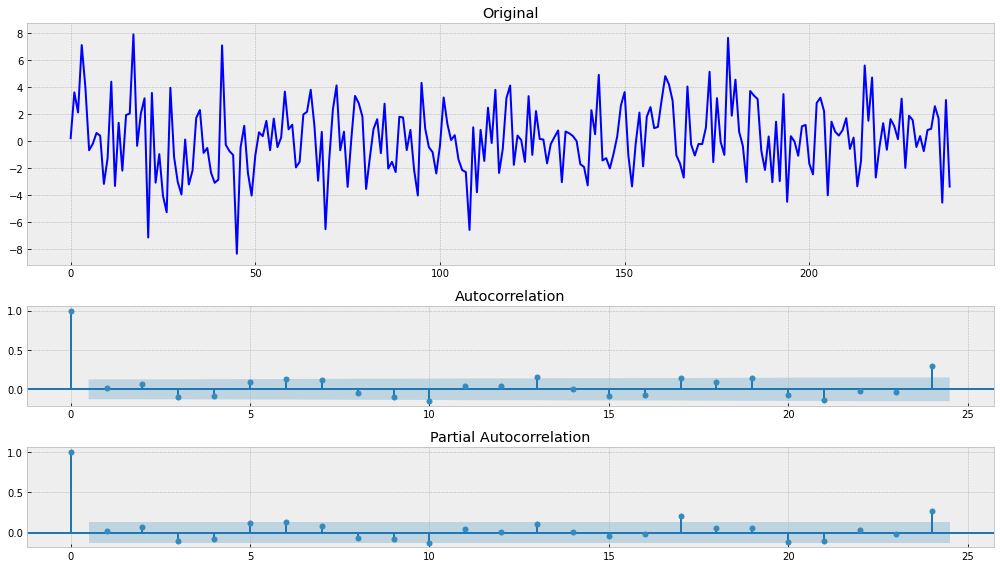

In [40]:
tsplot(mdl.resid)

In [41]:
mean_monthly_temp = mean_monthly_temp[12:] - mean_monthly_temp[:-12]
mean_monthly_temp = mean_monthly_temp[1:] - mean_monthly_temp[:-1]

In [42]:
mean_monthly_temp = mean_monthly_temp.astype(float)

In [43]:
p_ = 2
o_ = 1
q_ = 4

am = arch_model(mean_monthly_temp, dist = 'StudentsT')
res = am.fit(update_freq = 5, disp = 'off')
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -655.519
Distribution:      Standardized Student's t   AIC:                           1321.04
Method:                  Maximum Likelihood   BIC:                           1338.16
                                              No. Observations:                  227
Date:                      Fri, Jan 20 2023   Df Residuals:                      226
Time:                              15:21:01   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0

Results of Dickey-Fuller Test:
Test Statistic                -7.862241e+00
p-value                        5.246600e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


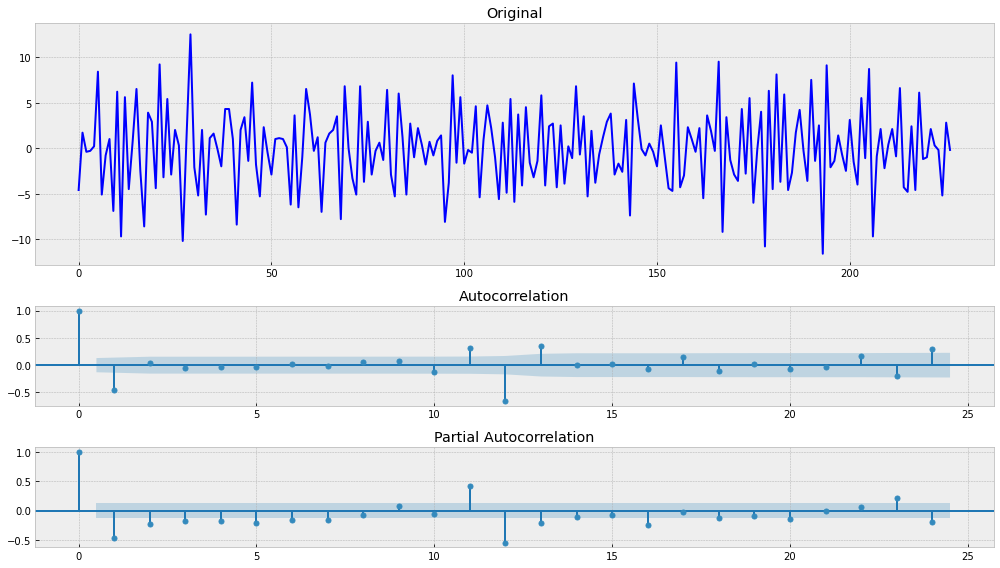

In [44]:
tsplot(res.resid)